# **Import Library**

In [394]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Exploratory Data Analysis**

In [395]:
df = pd.read_csv('heart_disease.csv')
df

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [396]:
df.drop(columns='Unnamed: 0', inplace=True)

## **Soal 1**

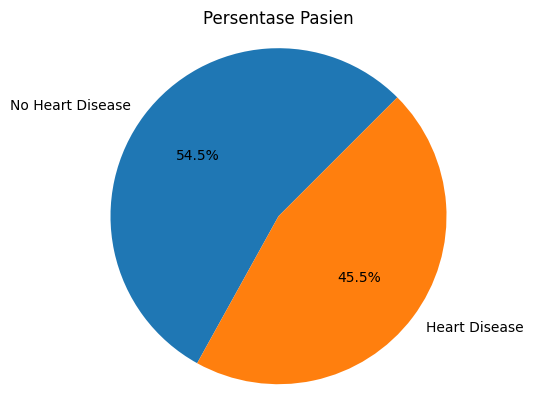

In [397]:
y_count = df['target'].value_counts()
plt.pie(y_count, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=45)
plt.title('Persentase Pasien')
plt.axis('equal')
plt.show()

**Insight :**
- Pasien yang tidak mengalami penyakit jantung sebanyak 54,5%
- Pasien yang mengalami penyakit jantung sebanyak 45,5%

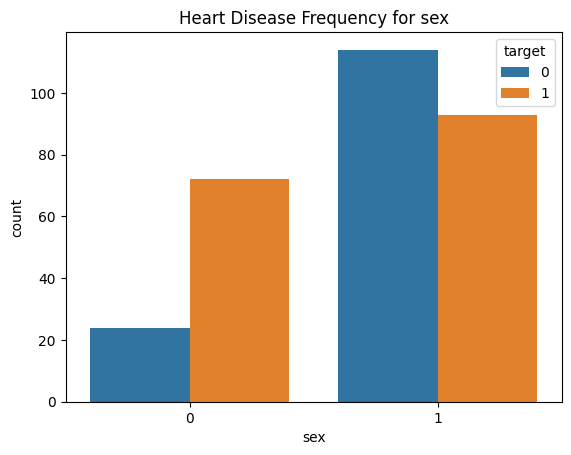

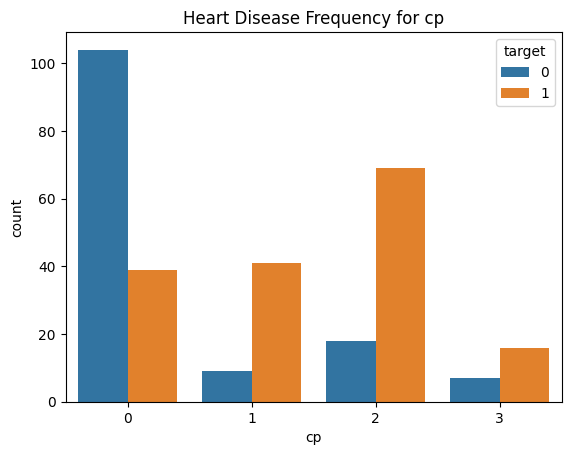

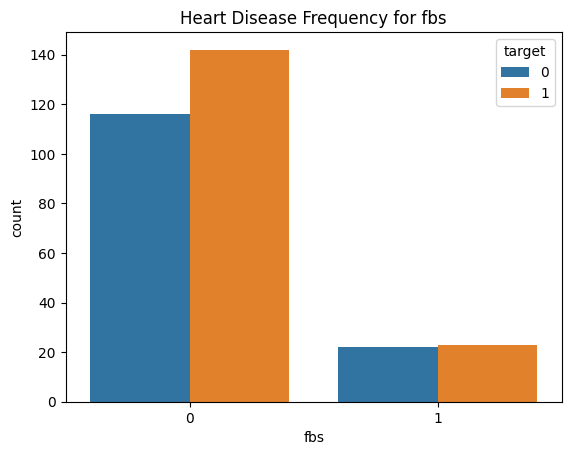

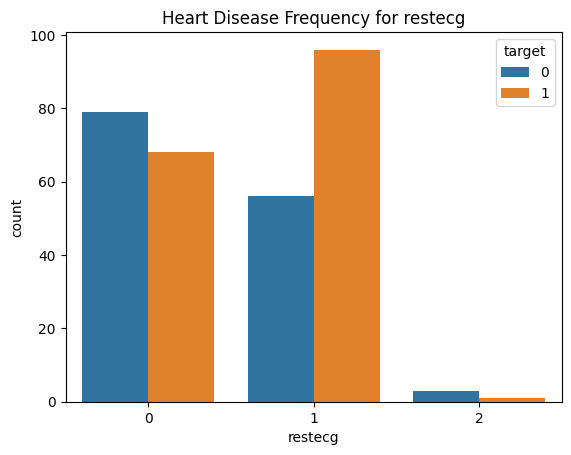

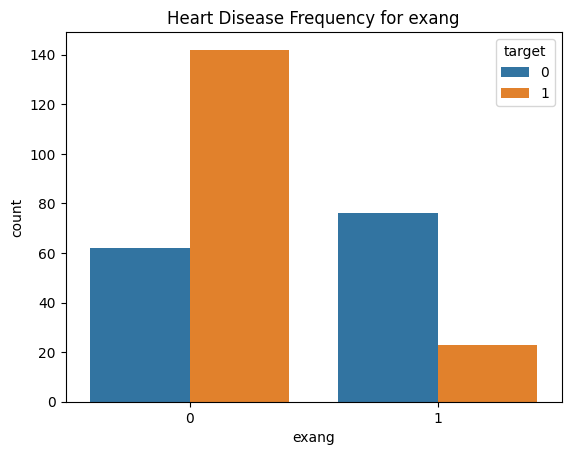

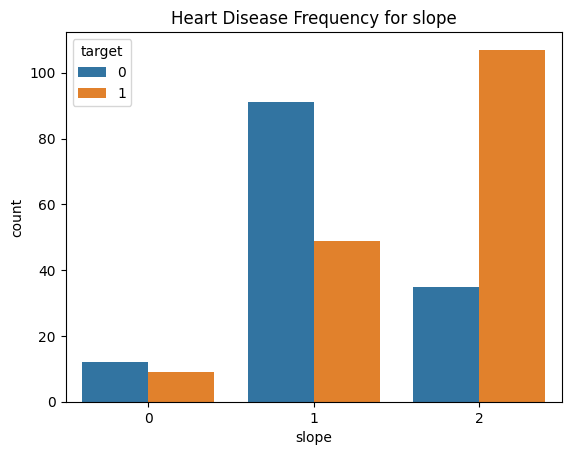

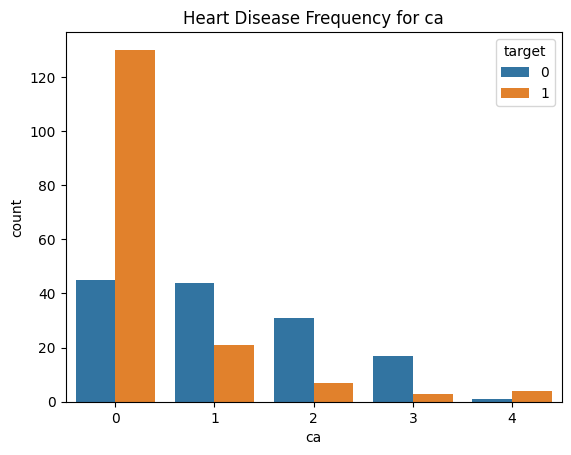

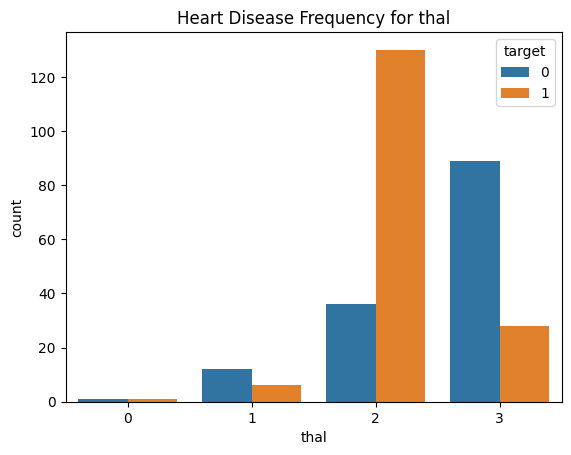

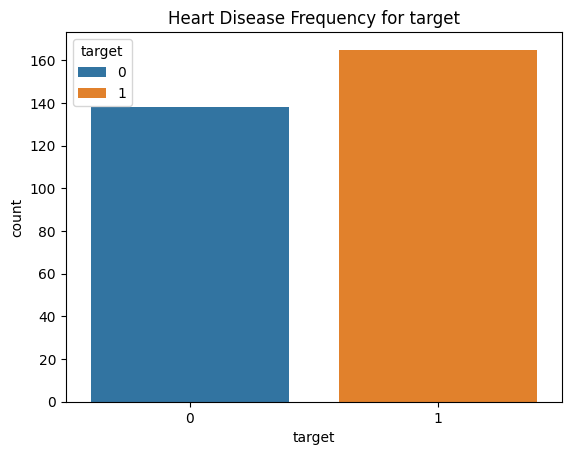

In [398]:
for col in df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']]:
    sns.countplot(x=col, data=df, hue='target')
    plt.title('Heart Disease Frequency for ' + col)
    plt.show()

## **Soal 2**

In [399]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [408]:
df['age_group'] = pd.to_numeric(pd.cut(df['age'],bins=[28,55,77], labels=[0,1],include_lowest=True))
df['chol_group'] = pd.to_numeric(pd.cut(df['chol'],bins=[126,211,274,564],labels=[0,1,2],include_lowest=True))

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,chol_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,2


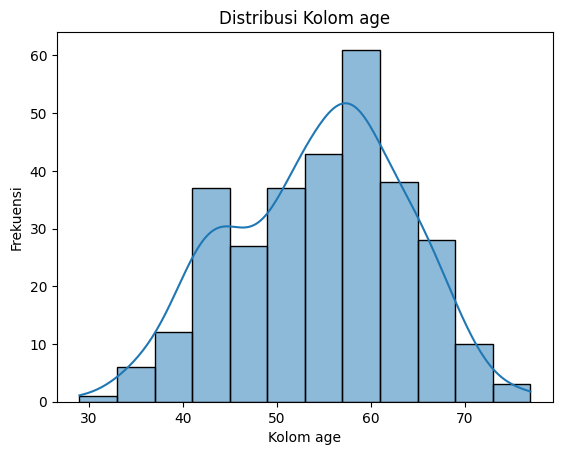

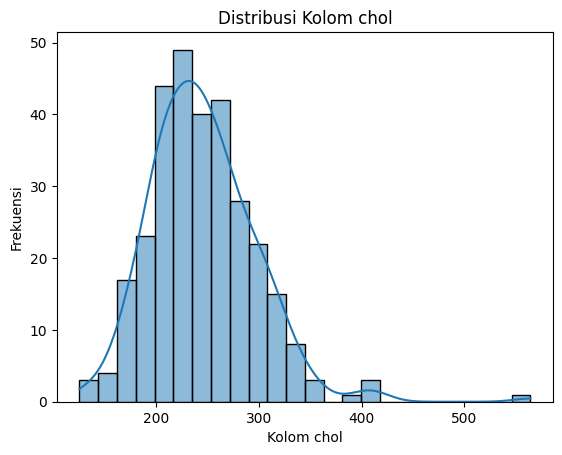

In [409]:
for col in df[['age', 'chol']]:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi Kolom {col}')
    plt.ylabel('Frekuensi')
    plt.xlabel(f'Kolom {col}')
    plt.show()

**Insight :**
- Distribusi kolom age seimbang
- Distribusi kolom chol agak miring positif

## **Soal 3**

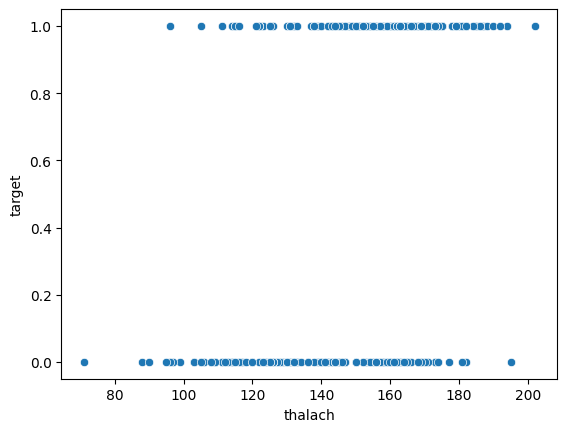

In [410]:
sns.scatterplot(x='thalach', y='target', data=df)
plt.show()

**Insight :**
- Metode Kendall Tau : 0.35
- Metode Spearman : 0.43
- Metode Pearson : 0.42

## **Soal 4**

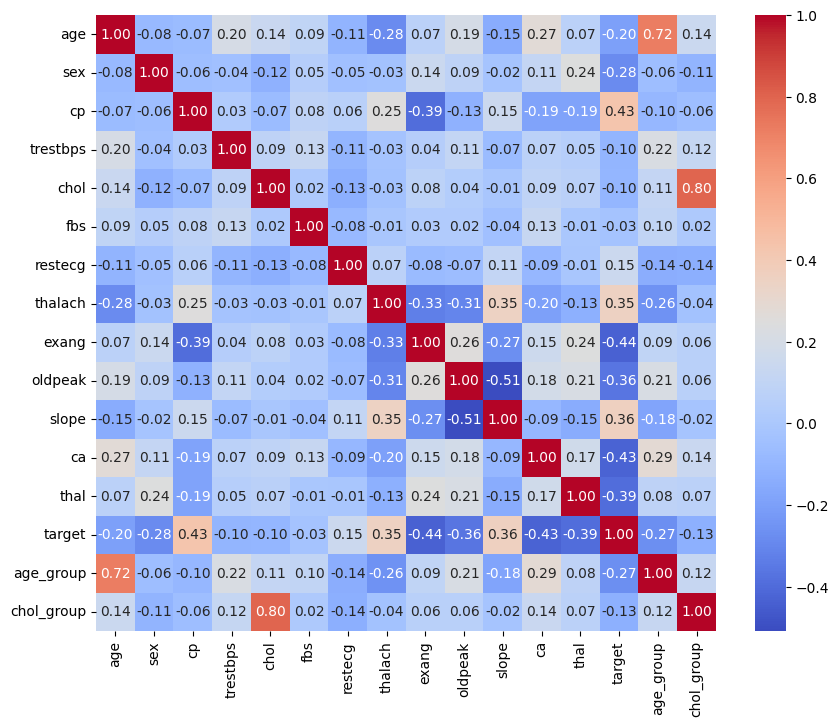

In [411]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr('kendall'), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

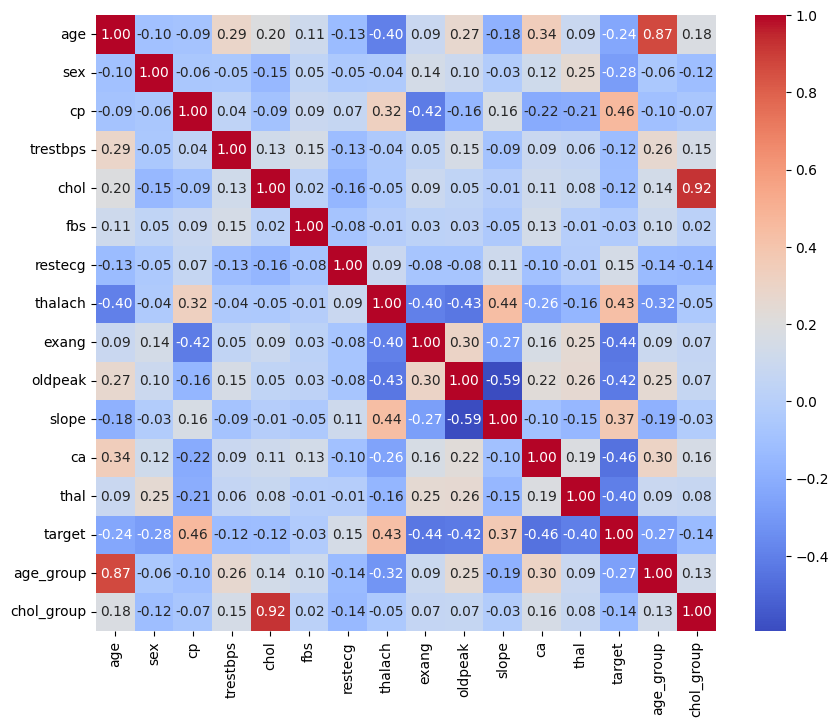

In [412]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr('spearman'), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [446]:
df.groupby('age_group')['target'].mean()

age_group
0    0.677632
1    0.410596
Name: target, dtype: float64

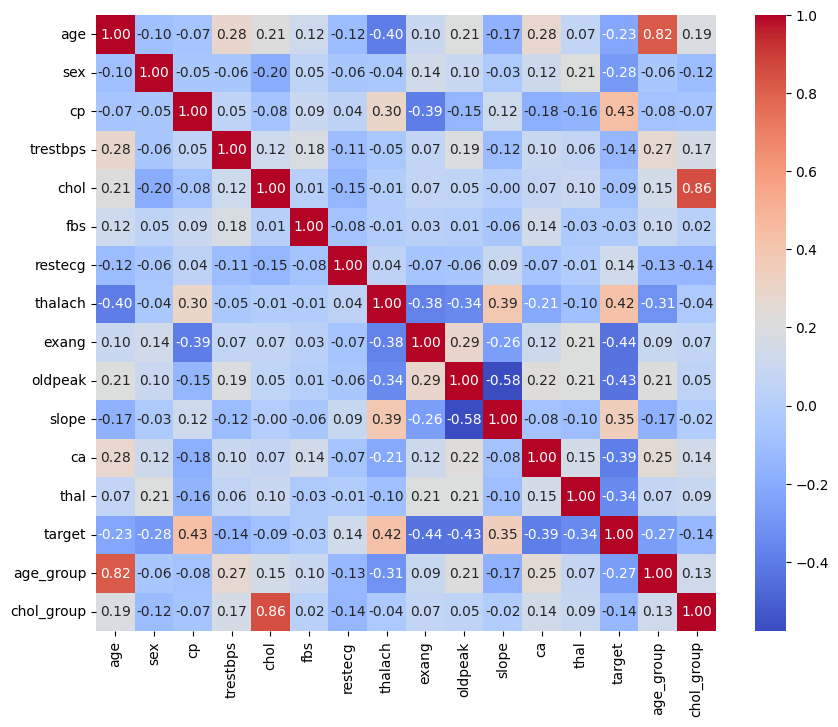

In [413]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr('pearson'), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

**Insight :**
- Kolom yang berkorelas tinggi dengan kolom target : slope, thalach, dan cp

## **Soal 5**

In [445]:
outlier_iqr = {}
for col in df[['chol', 'trestbps']]:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lwr = q1 - 1.5 * iqr
    upr = q3 + 1.5 * iqr
    outlier_iqr[col] = df[col][(df[col] < lwr) | (df[col] > upr)]

outlier_iqr

{'chol': 28     417
 85     564
 96     394
 220    407
 246    409
 Name: chol, dtype: int64,
 'trestbps': 8      172
 101    178
 110    180
 203    180
 223    200
 241    174
 248    192
 260    178
 266    180
 Name: trestbps, dtype: int64}

# **Preprocessing Data**

## **Soal 1**

In [415]:
df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope','thal'], drop_first=True).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         303 non-null    int64
 1   trestbps    303 non-null    int64
 2   chol        303 non-null    int64
 3   fbs         303 non-null    int64
 4   thalach     303 non-null    int64
 5   exang       303 non-null    int64
 6   oldpeak     303 non-null    int64
 7   ca          303 non-null    int64
 8   target      303 non-null    int64
 9   age_group   303 non-null    int64
 10  chol_group  303 non-null    int64
 11  sex_1       303 non-null    int64
 12  cp_1        303 non-null    int64
 13  cp_2        303 non-null    int64
 14  cp_3        303 non-null    int64
 15  restecg_1   303 non-null    int64
 16  restecg_2   303 non-null    int64
 17  slope_1     303 non-null    int64
 18  slope_2     303 non-null    int64
 19  thal_1      303 non-null    int64
 20  thal_2      303 non-null    int6

## **Soal 2**

In [416]:

def standardize_data(df):
    df_scaled = df.copy()
    for column in df.columns:
        if column != 'target':
            mean = np.mean(df[column])
            std = np.std(df[column])
            df_scaled[column] = (df[column] - mean) / std
    return df_scaled

df_scaled = standardize_data(df.drop(columns='target'))

## **Soal 3**

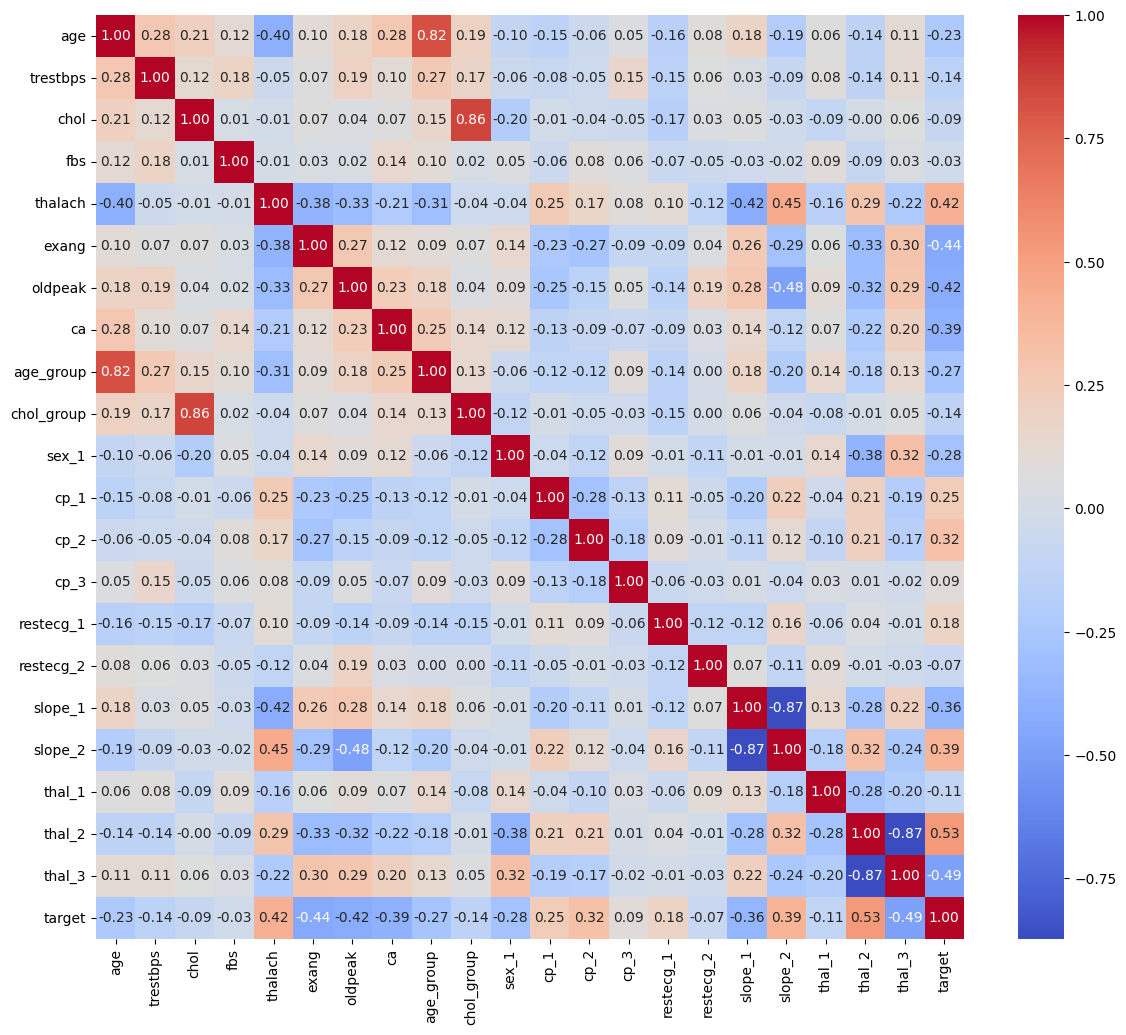

In [417]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df.drop(columns='target').columns
df_scaled['target'] = df['target']
plt.figure(figsize=(14, 12))
sns.heatmap(df_scaled.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [418]:
df_scaled.corr()['target'].sort_values()

thal_3       -0.486112
exang        -0.436757
oldpeak      -0.423572
ca           -0.391724
slope_1      -0.362053
sex_1        -0.280937
age_group    -0.268101
age          -0.225439
trestbps     -0.144931
chol_group   -0.138612
thal_1       -0.106589
chol         -0.085239
restecg_2    -0.068410
fbs          -0.028046
cp_3          0.086957
restecg_1     0.175322
cp_1          0.245879
cp_2          0.316742
slope_2       0.394066
thalach       0.421741
thal_2        0.527334
target        1.000000
Name: target, dtype: float64

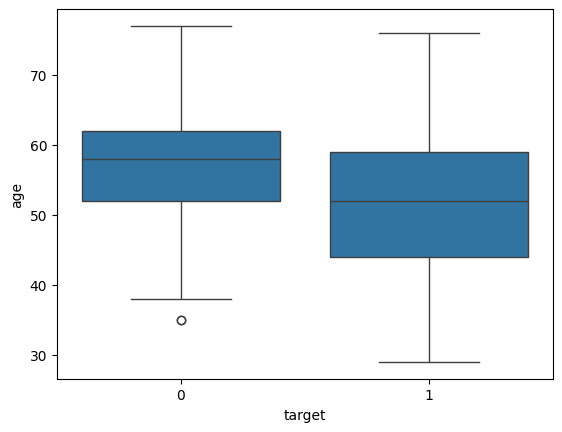

In [419]:
sns.boxplot(x=df['target'],y=df['age'])
plt.show()

In [420]:
# x = df_scaled.drop(columns=['target', 'trestbps', 'chol', 'fbs', 'exang', 'oldpeak', 'ca', 'age'])
# y = df_scaled['target']

In [421]:
x = df_scaled.drop(columns='target')
y = df_scaled['target']

## **Soal 4**

In [422]:
def train_test_split(x, y, test_size=0.2, stratify=None, random_state=None):
    np.random.seed(random_state)
    
    x = np.array(x)
    y = np.array(y)
    
    if stratify is not None:
        unique_classes, y_indices = np.unique(stratify, return_inverse=True)
        test_indices = np.array([], dtype=int)
        train_indices = np.array([], dtype=int)
        
        for class_index in range(len(unique_classes)):
            class_indices = np.where(y_indices == class_index)[0]
            np.random.shuffle(class_indices)
            
            n_test = int(len(class_indices) * test_size)
            test_indices = np.concatenate((test_indices, class_indices[:n_test]))
            train_indices = np.concatenate((train_indices, class_indices[n_test:]))
    else:
        indices = np.arange(len(y))
        np.random.shuffle(indices)
        
        n_test = int(len(y) * test_size)
        test_indices = indices[:n_test]
        train_indices = indices[n_test:]
    
    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

## **Soal 5**

In [423]:
y_train_count = pd.DataFrame(y_train)
print('y_train', y_train_count.value_counts())

y_train 0
1    132
0    111
Name: count, dtype: int64


In [424]:
def smote(x, y, random_state=42, k=5):
    np.random.seed(random_state)
    
    unique_classes = np.unique(y)
    class_counts = {class_label: np.sum(y == class_label) for class_label in unique_classes}
    max_class_count = max(class_counts.values())
    
    x_resampled = x.tolist()
    y_resampled = y.tolist()
    
    for class_label in unique_classes:
        if class_counts[class_label] < max_class_count:
            class_indices = np.where(y == class_label)[0]
            class_samples = x[class_indices]
            
            n_samples_to_generate = max_class_count - class_counts[class_label]
            
            for _ in range(n_samples_to_generate):
                sample_index = np.random.choice(class_indices)
                sample = x[sample_index]
                
                distances = np.linalg.norm(class_samples - sample, axis=1)
                nearest_neighbors = np.argsort(distances)[1:k+1]
                
                neighbor_index = np.random.choice(nearest_neighbors)
                neighbor = class_samples[neighbor_index]
                
                diff = neighbor - sample
                synthetic_sample = sample + np.random.rand() * diff
                
                x_resampled.append(synthetic_sample)
                y_resampled.append(class_label)
    
    return np.array(x_resampled), np.array(y_resampled)

x_train_resampled, y_train_resampled = smote(x_train, y_train)

In [425]:
y_train_count = pd.DataFrame(y_train_resampled)
print('y_train', y_train_count.value_counts())

y_train 0
0    132
1    132
Name: count, dtype: int64


# **Implementasi Machine Learning (KNN)**

## **Soal 1**

In [426]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def minkowski_distance(a, b, p):
    return np.sum(np.abs(a - b) ** p) ** (1 / p)

class KNeighborsClassifierManual:
    def __init__(self, n_neighbors=5, metric='euclidean', p=3):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.p = p

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
    
    def _predict(self, x):
        distances = [self._distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common
    
    def _distance(self, a, b):
        if self.metric == 'euclidean':
            return euclidean_distance(a, b)
        elif self.metric == 'manhattan':
            return manhattan_distance(a, b)
        elif self.metric == 'minkowski':
            return minkowski_distance(a, b, self.p)
        else:
            raise ValueError(f"Unknown metric: {self.metric}")

## **Soal 2**

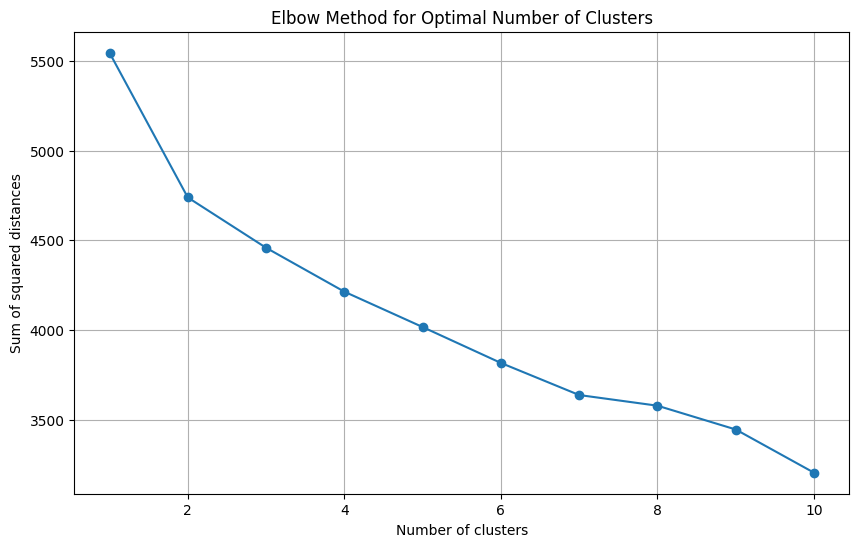

In [427]:
def initialize_centroids(X, k):
    np.random.seed(42)
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i] = X[labels == i].mean(axis=0)
    return centroids

def compute_inertia(X, labels, centroids):
    inertia = 0
    for i in range(centroids.shape[0]):
        inertia += np.sum((X[labels == i] - centroids[i]) ** 2)
    return inertia

def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    inertia = compute_inertia(X, labels, centroids)
    return centroids, labels, inertia

sse = []
for k in range(1, 11):
    _, _, inertia = kmeans(x_train_resampled, k)
    sse.append(inertia)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [428]:
knn = KNeighborsClassifierManual(n_neighbors=7, metric='euclidean')
knn.fit(x_train_resampled, y_train_resampled)
knn_pred = knn.predict(x_test)

In [429]:
accuracy = np.sum(knn_pred == y_test) / len(y_test)
print(f'Akurasi Model KNN {accuracy}')

Akurasi Model KNN 0.7833333333333333


## **Soal 3**

In [430]:
def precision_recall_f1_support(y_true, y_pred, average=None):
    labels = np.unique(np.concatenate((y_true, y_pred)))
    report = {}
    
    for label in labels:
        tp = sum((y_true[i] == label) and (y_pred[i] == label) for i in range(len(y_true)))
        fp = sum((y_true[i] != label) and (y_pred[i] == label) for i in range(len(y_true)))
        fn = sum((y_true[i] == label) and (y_pred[i] != label) for i in range(len(y_true)))
        tn = sum((y_true[i] != label) and (y_pred[i] != label) for i in range(len(y_true)))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        support = sum(y == label for y in y_true)

        report[label] = {
            'precision': precision,
            'recall': recall,
            'f1-score': f1_score,
            'support': support
        }

    if average == 'macro':
        avg_precision = sum(report[label]['precision'] for label in labels) / len(labels)
        avg_recall = sum(report[label]['recall'] for label in labels) / len(labels)
        avg_f1_score = sum(report[label]['f1-score'] for label in labels) / len(labels)
        avg_support = sum(report[label]['support'] for label in labels)
        
        report['macro avg'] = {
            'precision': avg_precision,
            'recall': avg_recall,
            'f1-score': avg_f1_score,
            'support': avg_support
        }
    
    return report

def print_classification_report(report):
    print(f"{'Label':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")
    print("="*50)
    for label, metrics in report.items():
        print(f"{label:<10} {metrics['precision']:<10.2f} {metrics['recall']:<10.2f} {metrics['f1-score']:<10.2f} {metrics['support']:<10}")

report_knn = precision_recall_f1_support(y_test, knn_pred, average='macro')
print_classification_report(report_knn)

Label      Precision  Recall     F1-Score   Support   
0          0.72       0.85       0.78       27        
1          0.86       0.73       0.79       33        
macro avg  0.79       0.79       0.78       60        


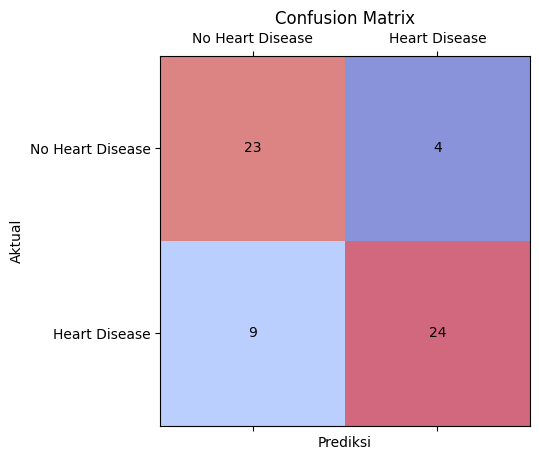

In [431]:
def confusion_matrix(y_test, y_pred):
    tp = fp = tn = fn = 0
    for true, pred in zip(y_test, y_pred):
        if true == 1 and pred == 1:
            tp += 1
        elif true == 0 and pred == 1:
            fp += 1
        elif true == 0 and pred == 0:
            tn += 1
        elif true == 1 and pred == 0:
            fn += 1
    
    confusion_matrix = np.array([[tn, fp], [fn, tp]])

    fig, ax = plt.subplots()
    ax.matshow(confusion_matrix, cmap='coolwarm', alpha=0.6)
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(x=j, y=i, s=confusion_matrix[i, j], va='center', ha='center')

    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.title('Confusion Matrix')
    plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
    plt.yticks([0, 1], ['No Heart Disease', 'Heart Disease'])
    plt.show()

confusion_matrix(y_test, knn_pred)

## **Soal 4**

In [432]:
class LogisticRegressionManual:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / self.m) * np.dot(X.T, (y_predicted - y))
            db = (1 / self.m) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

In [433]:
logreg = LogisticRegressionManual(learning_rate=0.001, n_iterations=1000)
logreg.fit(x_train_resampled, y_train_resampled)
logreg_pred = logreg.predict(x_test)

In [434]:
logreg_acc = np.mean(logreg_pred == y_test)
print(f'Logistic Regression Manual Accuracy: {logreg_acc:.2f}')

Logistic Regression Manual Accuracy: 0.80


In [435]:
def precision_recall_f1_support(y_true, y_pred, average=None):
    labels = np.unique(np.concatenate((y_true, y_pred)))
    report = {}
    
    for label in labels:
        tp = sum((y_true[i] == label) and (y_pred[i] == label) for i in range(len(y_true)))
        fp = sum((y_true[i] != label) and (y_pred[i] == label) for i in range(len(y_true)))
        fn = sum((y_true[i] == label) and (y_pred[i] != label) for i in range(len(y_true)))
        tn = sum((y_true[i] != label) and (y_pred[i] != label) for i in range(len(y_true)))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        support = sum(y == label for y in y_true)

        report[label] = {
            'precision': precision,
            'recall': recall,
            'f1-score': f1_score,
            'support': support
        }

    if average == 'macro':
        avg_precision = sum(report[label]['precision'] for label in labels) / len(labels)
        avg_recall = sum(report[label]['recall'] for label in labels) / len(labels)
        avg_f1_score = sum(report[label]['f1-score'] for label in labels) / len(labels)
        avg_support = sum(report[label]['support'] for label in labels)
        
        report['macro avg'] = {
            'precision': avg_precision,
            'recall': avg_recall,
            'f1-score': avg_f1_score,
            'support': avg_support
        }
    
    return report

def print_classification_report(report):
    print(f"{'Label':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")
    print("="*50)
    for label, metrics in report.items():
        print(f"{label:<10} {metrics['precision']:<10.2f} {metrics['recall']:<10.2f} {metrics['f1-score']:<10.2f} {metrics['support']:<10}")

report_knn = precision_recall_f1_support(y_test, logreg_pred, average='macro')
print_classification_report(report_knn)

Label      Precision  Recall     F1-Score   Support   
0          0.74       0.85       0.79       27        
1          0.86       0.76       0.81       33        
macro avg  0.80       0.80       0.80       60        


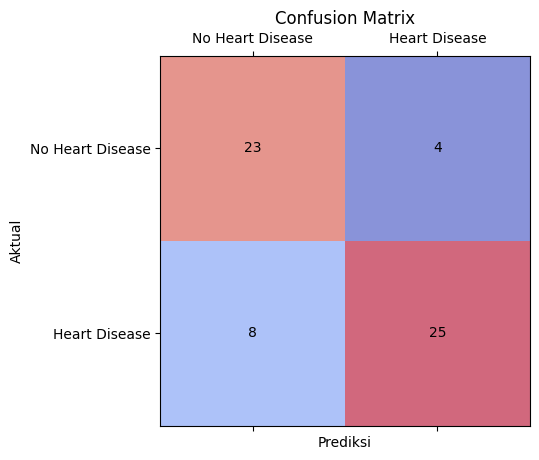

In [436]:
def confusion_matrix(y_test, y_pred):
    tp = fp = tn = fn = 0
    for true, pred in zip(y_test, y_pred):
        if true == 1 and pred == 1:
            tp += 1
        elif true == 0 and pred == 1:
            fp += 1
        elif true == 0 and pred == 0:
            tn += 1
        elif true == 1 and pred == 0:
            fn += 1
    
    confusion_matrix = np.array([[tn, fp], [fn, tp]])

    fig, ax = plt.subplots()
    ax.matshow(confusion_matrix, cmap='coolwarm', alpha=0.6)
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(x=j, y=i, s=confusion_matrix[i, j], va='center', ha='center')

    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.title('Confusion Matrix')
    plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
    plt.yticks([0, 1], ['No Heart Disease', 'Heart Disease'])
    plt.show()

confusion_matrix(y_test, logreg_pred)

# **Evaluasi Model**

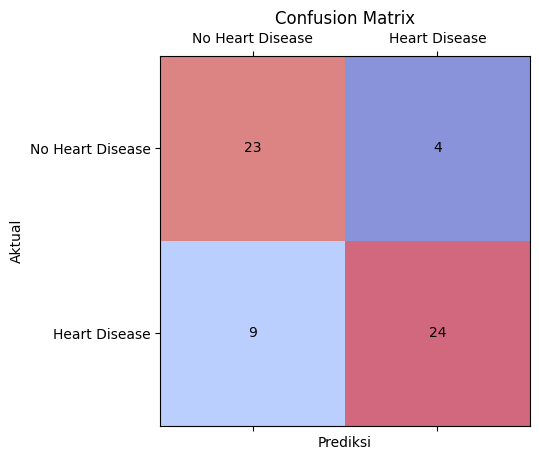

In [437]:
def confusion_matrix(y_test, y_pred):
    tp = fp = tn = fn = 0
    for true, pred in zip(y_test, y_pred):
        if true == 1 and pred == 1:
            tp += 1
        elif true == 0 and pred == 1:
            fp += 1
        elif true == 0 and pred == 0:
            tn += 1
        elif true == 1 and pred == 0:
            fn += 1
    
    confusion_matrix = np.array([[tn, fp], [fn, tp]])

    fig, ax = plt.subplots()
    ax.matshow(confusion_matrix, cmap='coolwarm', alpha=0.6)
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(x=j, y=i, s=confusion_matrix[i, j], va='center', ha='center')

    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.title('Confusion Matrix')
    plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
    plt.yticks([0, 1], ['No Heart Disease', 'Heart Disease'])
    plt.show()

confusion_matrix(y_test, knn_pred)

In [438]:
class DecisionTreeManual:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes = len(set(y))
        self.n_features = X.shape[1]
        self.tree = self._grow_tree(X, y)

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        if n_samples == 0 or (self.max_depth is not None and depth >= self.max_depth):
            return None

        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes)]
        predicted_class = np.argmax(num_samples_per_class)
        node = {'predicted_class': predicted_class}

        if len(set(y)) == 1:
            return node

        best_feature, best_threshold = self._best_split(X, y)
        if best_feature is None:
            return node

        indices_left = X[:, best_feature] < best_threshold
        X_left, y_left = X[indices_left], y[indices_left]
        X_right, y_right = X[~indices_left], y[~indices_left]

        node['feature'] = best_feature
        node['threshold'] = best_threshold
        node['left'] = self._grow_tree(X_left, y_left, depth + 1)
        node['right'] = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _best_split(self, X, y):
        m, n = X.shape
        if m <= 1:
            return None, None

        num_parent = [np.sum(y == c) for c in range(self.n_classes)]
        best_gini = 1.0 - sum((num / m) ** 2 for num in num_parent)
        best_idx, best_thr = None, None

        for idx in range(n):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in range(self.n_classes))
                gini_right = 1.0 - sum((num_right[x] / (m - i)) ** 2 for x in range(self.n_classes))
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2
        return best_idx, best_thr

    def _predict(self, inputs):
        node = self.tree
        while node.get('left'):
            if inputs[node['feature']] < node['threshold']:
                node = node['left']
            else:
                node = node['right']
        return node['predicted_class']

In [439]:
dt = DecisionTreeManual(max_depth=5)
dt.fit(x_train_resampled, y_train_resampled)
dt_pred = dt.predict(x_test)

In [440]:
dt_acc = np.mean(dt_pred == y_test)
print(f'Decision Tree Manual Accuracy: {dt_acc:.2f}')

Decision Tree Manual Accuracy: 0.72


In [441]:
def precision_recall_f1_support(y_true, y_pred, average=None):
    labels = np.unique(np.concatenate((y_true, y_pred)))
    report = {}
    
    for label in labels:
        tp = sum((y_true[i] == label) and (y_pred[i] == label) for i in range(len(y_true)))
        fp = sum((y_true[i] != label) and (y_pred[i] == label) for i in range(len(y_true)))
        fn = sum((y_true[i] == label) and (y_pred[i] != label) for i in range(len(y_true)))
        tn = sum((y_true[i] != label) and (y_pred[i] != label) for i in range(len(y_true)))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        support = sum(y == label for y in y_true)

        report[label] = {
            'precision': precision,
            'recall': recall,
            'f1-score': f1_score,
            'support': support
        }

    if average == 'macro':
        avg_precision = sum(report[label]['precision'] for label in labels) / len(labels)
        avg_recall = sum(report[label]['recall'] for label in labels) / len(labels)
        avg_f1_score = sum(report[label]['f1-score'] for label in labels) / len(labels)
        avg_support = sum(report[label]['support'] for label in labels)
        
        report['macro avg'] = {
            'precision': avg_precision,
            'recall': avg_recall,
            'f1-score': avg_f1_score,
            'support': avg_support
        }
    
    return report

def print_classification_report(report):
    print(f"{'Label':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")
    print("="*50)
    for label, metrics in report.items():
        print(f"{label:<10} {metrics['precision']:<10.2f} {metrics['recall']:<10.2f} {metrics['f1-score']:<10.2f} {metrics['support']:<10}")

report_knn = precision_recall_f1_support(y_test, dt_pred, average='macro')
print_classification_report(report_knn)

Label      Precision  Recall     F1-Score   Support   
0          0.68       0.70       0.69       27        
1          0.75       0.73       0.74       33        
macro avg  0.71       0.72       0.71       60        


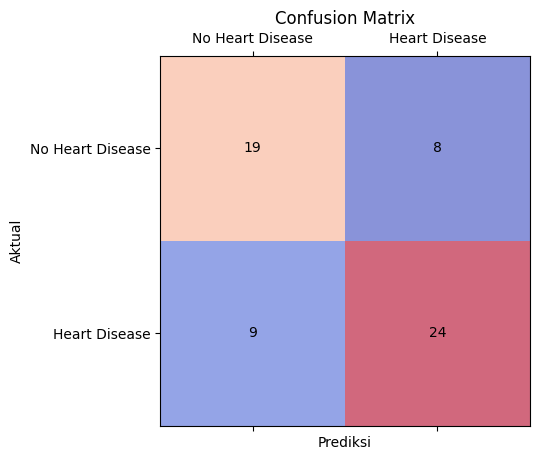

In [442]:
def confusion_matrix(y_test, y_pred):
    tp = fp = tn = fn = 0
    for true, pred in zip(y_test, y_pred):
        if true == 1 and pred == 1:
            tp += 1
        elif true == 0 and pred == 1:
            fp += 1
        elif true == 0 and pred == 0:
            tn += 1
        elif true == 1 and pred == 0:
            fn += 1
    
    confusion_matrix = np.array([[tn, fp], [fn, tp]])

    fig, ax = plt.subplots()
    ax.matshow(confusion_matrix, cmap='coolwarm', alpha=0.6)
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(x=j, y=i, s=confusion_matrix[i, j], va='center', ha='center')

    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.title('Confusion Matrix')
    plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
    plt.yticks([0, 1], ['No Heart Disease', 'Heart Disease'])
    plt.show()

confusion_matrix(y_test, dt_pred)

In [443]:
def cross_val_score_knn(knn, X, y, cv=5):
    np.random.seed(42)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    fold_sizes = np.full(cv, X.shape[0] // cv, dtype=int)
    fold_sizes[:X.shape[0] % cv] += 1
    current = 0
    scores = []

    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        test_indices = indices[start:stop]
        train_indices = np.concatenate([indices[:start], indices[stop:]])
        current = stop

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / len(y_test)
        scores.append(accuracy)

    return np.array(scores)

scores = cross_val_score_knn(knn, x_train_resampled, y_train_resampled, cv=10)
print(f'Cross-validation scores: {scores}')
print(f'Mean accuracy: {scores.mean()}')

Cross-validation scores: [0.96296296 0.92592593 0.74074074 0.74074074 0.84615385 0.88461538
 0.76923077 0.73076923 0.80769231 0.80769231]
Mean accuracy: 0.8216524216524217


In [444]:
new_data = {
    'age': 55,
    'trestbps': 130,
    'chol': 250,
    'fbs': 0,
    'thalach': 150,
    'exang': 0,
    'oldpeak': 1.5,
    'ca': 0,
    'sex_1': 0,
    'cp_1': 0,
    'cp_2': 1,
    'cp_3': 0,
    'slope_1': 0,
    'slope_2': 1,
    'thal_1': 0,
    'thal_2': 1,
    'thal_3': 0
}
new_data_df = pd.DataFrame([new_data])
new_data_scaled = standardize_data(new_data_df)

# Predict with KNN
knn_prediction = knn.predict(new_data_scaled.values)
print(f'KNN Prediction: {knn_prediction[0]}')

# Predict with Logistic Regression
logreg_prediction = logreg.predict(new_data_scaled.values)
print(f'Logistic Regression Prediction: {logreg_prediction[0]}')

ValueError: operands could not be broadcast together with shapes (17,) (21,) 